# Step 0.1: Data Loading

In [1]:
import os
import pandas as pd
from openai import OpenAI
from sklearn.model_selection import train_test_split
from src.three_step import *
from src.baseline import *
from src.prompt import *

client = OpenAI()

USER_ID = user_id = 123
USER_ID2 = 234
candidate_size = 100

data = pd.read_csv("data/merged_df.csv")

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_user_df = train_data[train_data["userId"] == user_id]
train_title = train_user_df["title"]

test_user_df = test_data[test_data["userId"] == user_id]
test_title = test_user_df["title"]



ModuleNotFoundError: No module named 'func'

In [ ]:
def get_accuracy_3step(train_data, test_data, user_id):
    
    train_user_df = train_data[train_data["userId"] == user_id]
    train_title = train_user_df["title"]

    test_user_df = test_data[test_data["userId"] == user_id]
    test_title = test_user_df["title"]

    threeStepRecommender = ThreeStepRecommender(user_id, train_data, candidate_size)
    movie_pred = threeStepRecommender.get_pred()
    accuracy1 = threeStepRecommender.accuracy(movie_pred, test_title)
    return accuracy1

accuracy_3step = get_accuracy_3step(train_data, test_data, user_id)
accuracy_3step
    

0.1

In [ ]:
def get_accuracy_popular(train_data, test_data, user_id):
    train_user_df = train_data[train_data["userId"] == user_id]
    train_title = train_user_df["title"]
    test_user_df = test_data[test_data["userId"] == user_id]
    test_title = test_user_df["title"]
    mostPopularRecommendor = MostPopularRecommendor(train_data)
    baseline_pred = mostPopularRecommendor.pred()
    accuracy2 = mostPopularRecommendor.accuracy(baseline_pred, test_title)
    return accuracy2

accuracy_popular = get_accuracy_popular(train_data, test_data, user_id)
accuracy_popular

0.1

In [ ]:
recommend_prompt = RecommendPrompt(data)
prompt, answer, recommendations = recommend_prompt.prompt_recommend_with_user_history(USER_ID)
accuracy_user = recommend_prompt.accuracy(recommendations, USER_ID)
print(f"Accuracy of User History Prompting: {accuracy_user}")

Inception in test
Whiplash in test
Accuracy of User History Prompting: 0.2


In [ ]:
prompt, answer, recommendations = recommend_prompt.prompt_recommend_with_partner_history(USER_ID, USER_ID2)
accuracy_partner = recommend_prompt.accuracy(recommendations, USER_ID)
print(f"Accuracy of Partner History Prompting: {accuracy_partner}")

Accuracy of Partner History Prompting: 0.0


In [ ]:
prompt, answer, recommendations = recommend_prompt.prompt_with_genre(USER_ID)
accuracy_genre = recommend_prompt.accuracy(recommendations, USER_ID)
print(f"Accuracy of Genre Prompting: {accuracy_genre}")

/Users/yiyang/Desktop/RL Apps/LLM_Item_Recommendation/src/prompt.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['genres'] = user_data['genres'].str.split('|')


Accuracy of Genre Prompting: 0.0


In [ ]:
prompt, answer, recommendations = recommend_prompt.prompt_with_similar_user(USER_ID)
accuracy_similar_user = recommend_prompt.accuracy(recommendations, USER_ID)
print(f"Accuracy of Similar User Prompting: {accuracy_similar_user}")

Interstellar in test
Accuracy of Similar User Prompting: 0.1


In [ ]:
prompt, answer, recommendations = recommend_prompt.prompt_for_rating(USER_ID)
rmse_prompt = recommend_prompt.evaluation(recommendations, USER_ID)
print(f"RMSE of Rvaluation Prompting: {rmse_prompt}")

Recommendation Rating RMSE: 0.2916666666666667
RMSE of Rvaluation Prompting: 0.2916666666666667


In [ ]:
rmse_collaborative = 0.7063453808169152

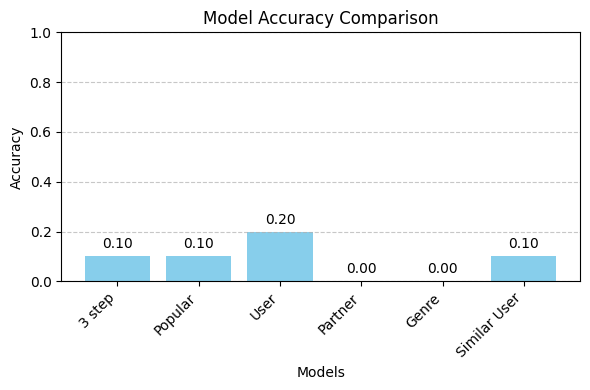

In [ ]:
import matplotlib.pyplot as plt

# Names of the models
models = ['3 step', 'Popular', 'User', 'Partner','Genre' ,'Similar User']

# Accuracy scores of the models
accuracy_scores = [accuracy_3step, accuracy_popular, accuracy_user, accuracy_partner, accuracy_genre, accuracy_similar_user]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Display the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

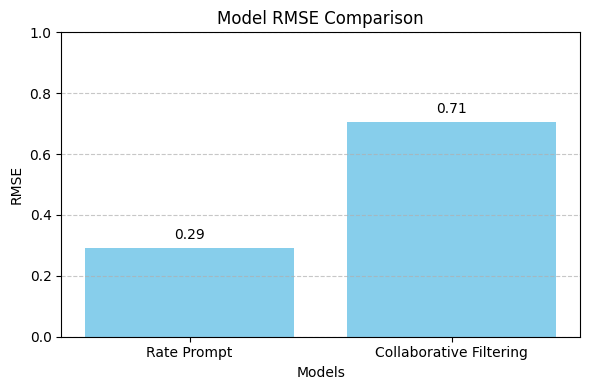

In [ ]:
import matplotlib.pyplot as plt

# Names of the models
models = ['Rate Prompt', 'Collaborative Filtering']

# Accuracy scores of the models
accuracy_scores = [rmse_prompt, rmse_collaborative]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(rotation=45, ha='right')

# Display the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()